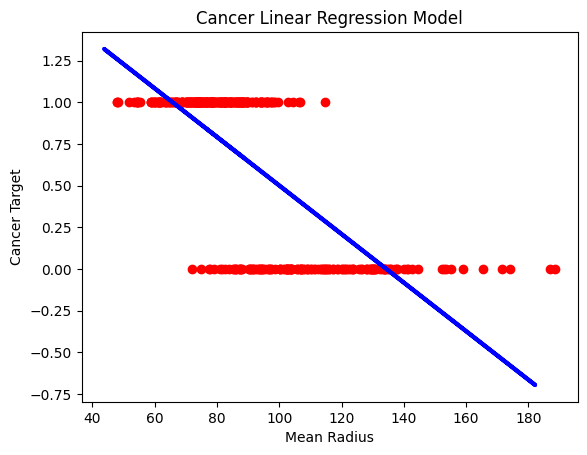

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Import train_test_split

# Load the dataset
cancer = load_breast_cancer()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cancer.data[:, np.newaxis, 2], cancer.target, test_size=0.3)

# Create a linear regression object
model = LinearRegression()

# Fit the model using the training data
model.fit(x_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(x_test)

# Plot the regression line and scatter plot
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Mean Radius')
plt.ylabel('Cancer Target')
plt.title('Cancer Linear Regression Model')
plt.show()

In [2]:
import mlflow


mlflow.end_run()

In [24]:
mlflow.log_artifact("/Users/USER/Desktop/some_directory")

In [18]:
result = mlflow.register_model(
    "runs:/7eb5039cf80c4e199164df267158ca01/linear", "linear-regression-model_11"
)

Registered model 'linear-regression-model_11' already exists. Creating a new version of this model...
2023/03/27 21:35:37 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: linear-regression-model_11, version 2
Created version '2' of model 'linear-regression-model_11'.


In [27]:
from mlflow import MlflowClient

client = MlflowClient()
client.create_registered_model("linear-regression-model_1012")

<RegisteredModel: creation_timestamp=1679933247114, description=None, last_updated_timestamp=1679933247114, latest_versions=[], name='linear-regression-model_1012', tags={}>

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import mlflow

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into train and test sets
X_train = cancer.data[:400, :]
y_train = cancer.target[:400]
X_test = cancer.data[400:, :]
y_test = cancer.target[400:]

# Define the different parameter configurations to try
params = [
    {'C': 0.1}
]

# Train and evaluate a logistic regression model for each parameter configuration
for i, param in enumerate(params):
    with mlflow.start_run(run_name=f"Demo_run_4 {i+1}"):
        # Log the parameters for this run
        for key, value in param.items():
            mlflow.log_param(key, value)
        
        # Fit the logistic regression model with the specified parameters
        model = LogisticRegression(C=param['C'])
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Evaluate the model and log the results
        accuracy = accuracy_score(y_test, y_pred)
        mlflow.log_metric("accuracy", accuracy)
        
        # Print the results
        print(f"demo_run_4 {i+1} - accuracy: {accuracy}")
    
        # Save the model artifact to the specified directory
        mlflow.sklearn.log_model(model, "model", registered_model_name="linear-regression-model_demo")

        # Save the experiment artifacts to the specified directory
        mlflow.log_artifact("/Users/USER/Desktop/some_file.txt")


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


demo_run_4 1 - accuracy: 0.9112426035502958


Registered model 'linear-regression-model_demo' already exists. Creating a new version of this model...
2023/03/28 12:25:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: linear-regression-model_demo, version 3
Created version '3' of model 'linear-regression-model_demo'.
